# Importance of Nodes and Groups

The data consists of interactions and mentions between characters in the Star Wars sci-fi film series. An interaction can be seen as an appearance in the film.

In the following notebook, we analyse the meaning of nodes and node groups using the following metrics:

- Degree
- connectedness
- betweenness
- Eigenvector

The data consists of interactions and mentions between characters over 6 periods, and the following questions are attempted to be answered:

- Degree
  - Is a character with a high degree centrality value automatically the main player?
- Who is important based on interactions/mentions?
- How does the importance of characters change over time?
- Who is connected to influential characters? (Eigenvector)
- Which characters connect different parts of the network? (Dwell time)
- Which people can reach others quickly and thus spread information easily? (Closeness)


## Degree

A high degree centrality value for the interaction dataset should tell us who the main character is, as this character appears most frequently in each episode.
From episode 1 to 6, the character with the highest degree centrality value is also the main character, except in episode 7. In episode 7, `POE`, `FINN` and `HAN` have a high degree centrality, but the main character is Daisy Ridley as `REY`. This is counter intuitive as you would expect the lead actor to appear more often than the other actors.

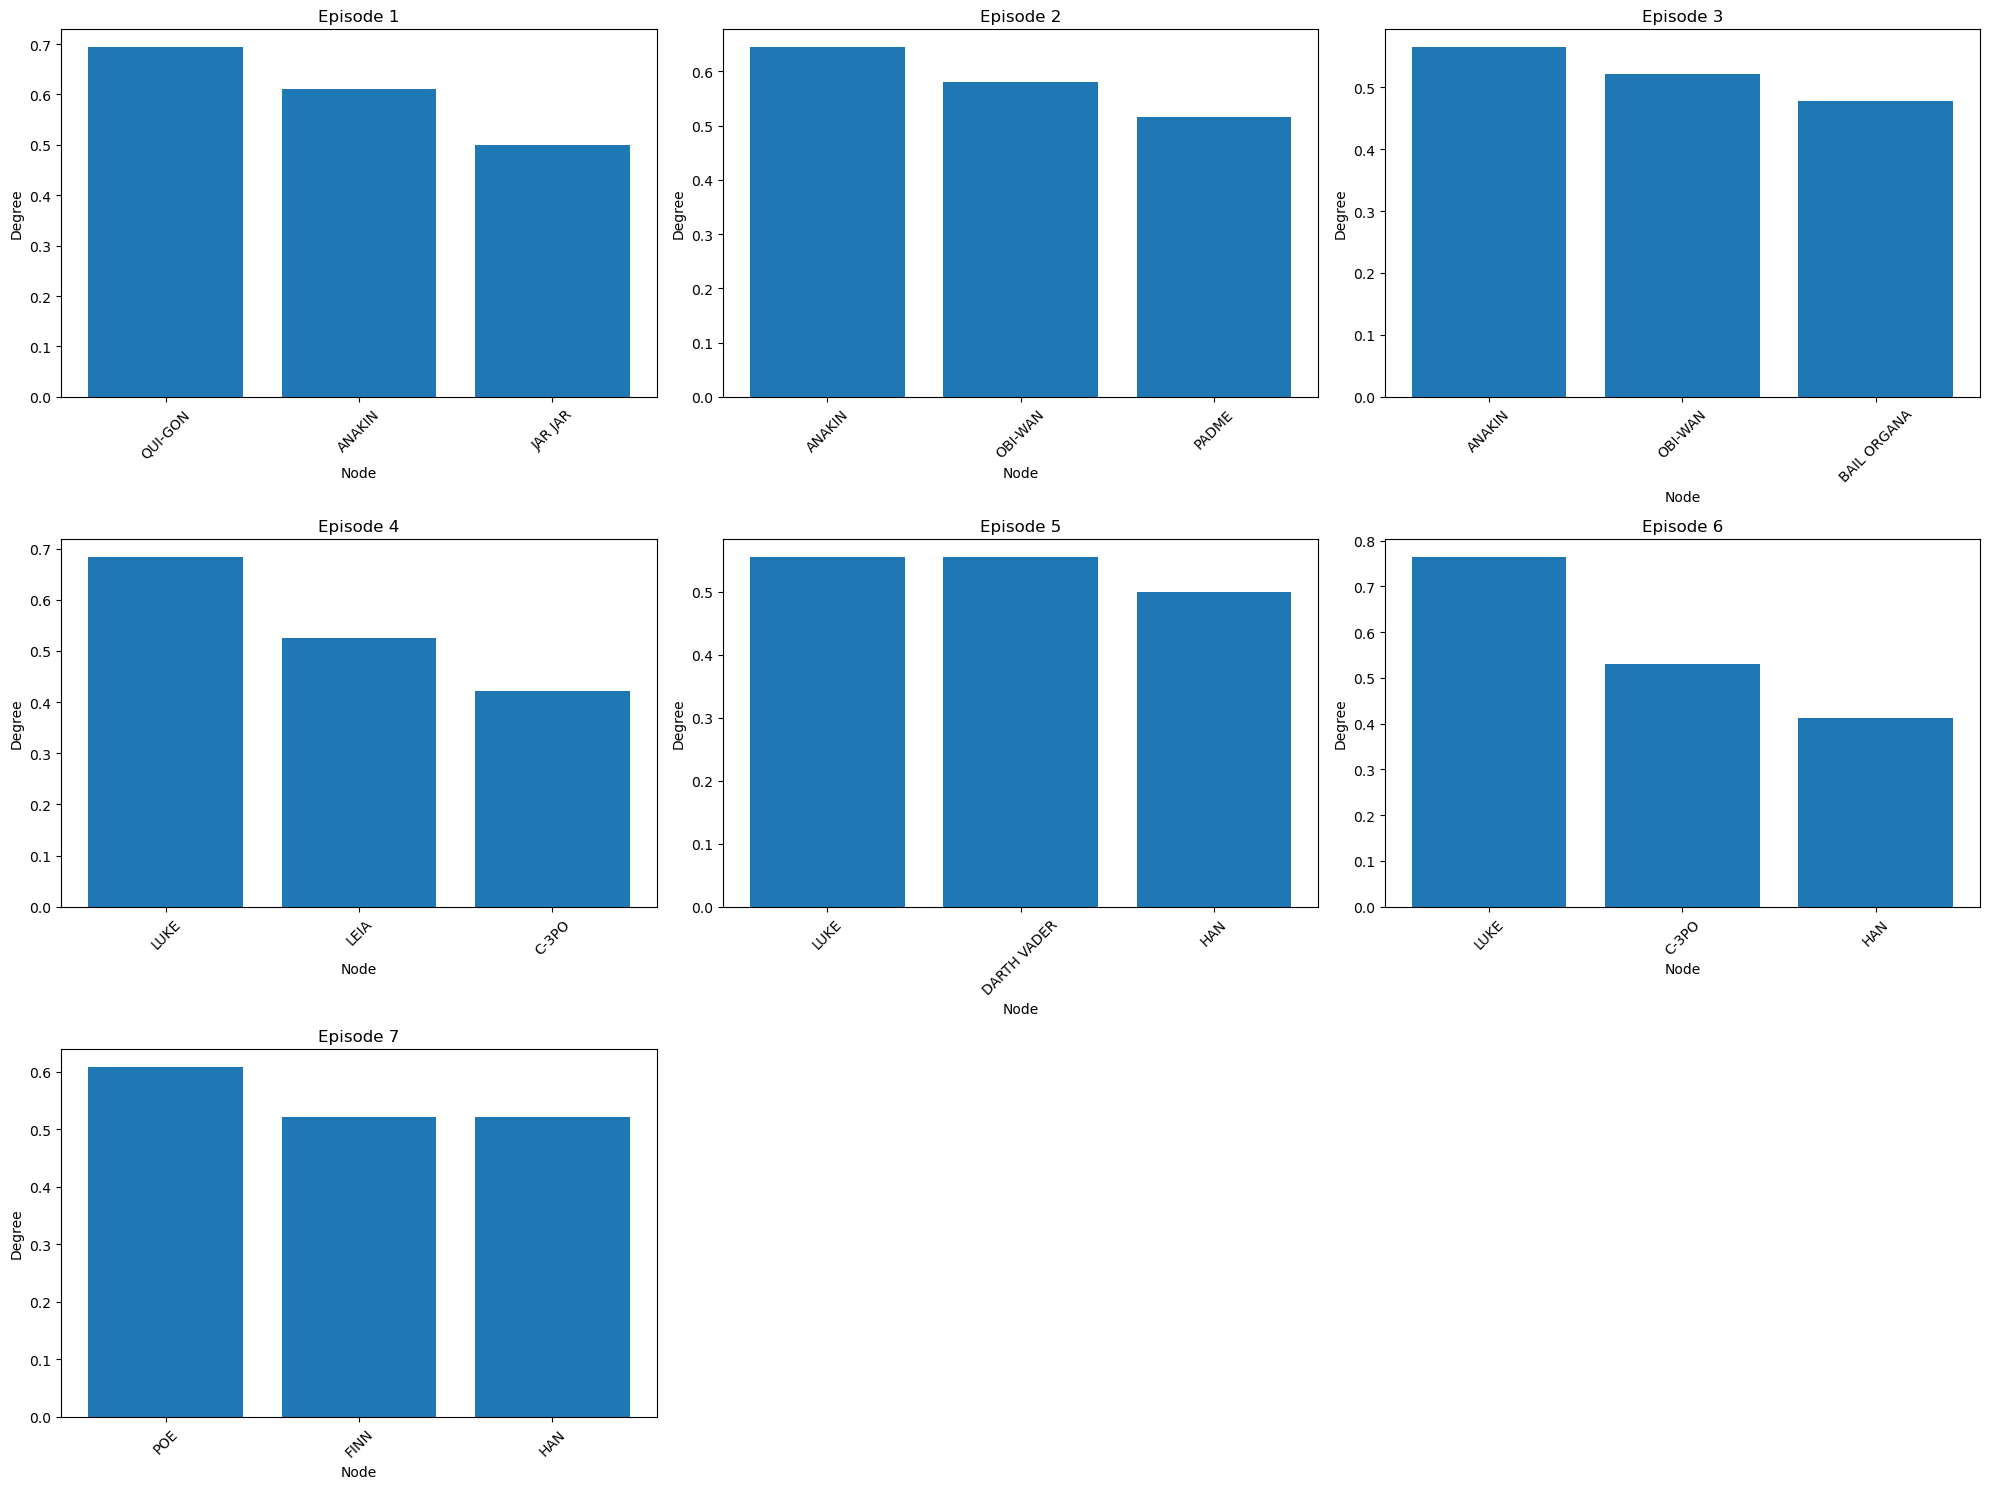

In [11]:
import os
import plots
import utils
import networkx as nx
import importlib

importlib.reload(plots)
import plots

interactions: dict = utils.load_json("data/starwars-full-interactions.json")
G = nx.Graph(name="Interactions")
G = utils.get_graph_with_nodes_and_edges(G, interactions)

interaction_files = [
    f
    for f in os.listdir("data/")
    if "full" not in f and "interactions" in f and "allCharacters" not in f
]
interaction_files.sort(key=lambda x: int(x.split("-")[2]))
plots.plot_centrality_over_time(G, interaction_files, centrality_type="degree")

<module 'matplotlib.pyplot' from '/Users/hariveliki/miniconda3/envs/san/lib/python3.10/site-packages/matplotlib/pyplot.py'>

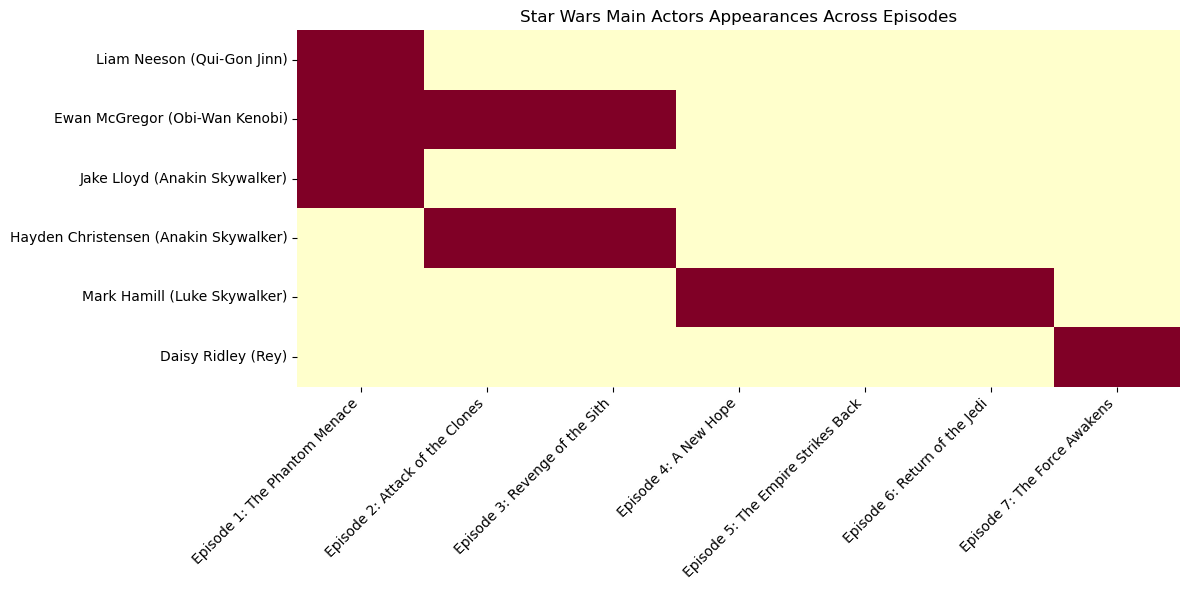

In [12]:
plots.plot_actor_appearances()